In [1]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import importlib
import ast

import os
import sys

path_ = os.path.abspath(os.path.join('..', '00_utils'))
if path_ not in sys.path:
    sys.path.append(path_)
    
import analyse_results
reload_module = analyse_results.reload_module

Graphs = reload_module('analyse_results', 'Graphs')
Results = reload_module('analyse_results', 'Results')

## Regularization
* penalty_values = [0, 1e-7, 1e-5, 1e-3, 0.01, 0.1, 1]
* [7, 36, 1]
* "tol" : 1e-5
* "compl_inf_tol": 1e-3, "constr_viol_tol": 1e-3

In [2]:
fn = '2024-08-15_20-39-02_reg_full.pkl'
with open(f'results/{fn}', 'rb') as file:
    results_reg_full = pickle.load(file)

In [3]:
df_reg = Results.collect_data(results_reg_full)
reg = Results.columns_to_lists(df_reg)
reg.keys()

dict_keys(['Times_Elapsed', 'MSE_odeint', 'MSE_collocation', 'MSE_odeint_test', 'MSE_collocation_test'])

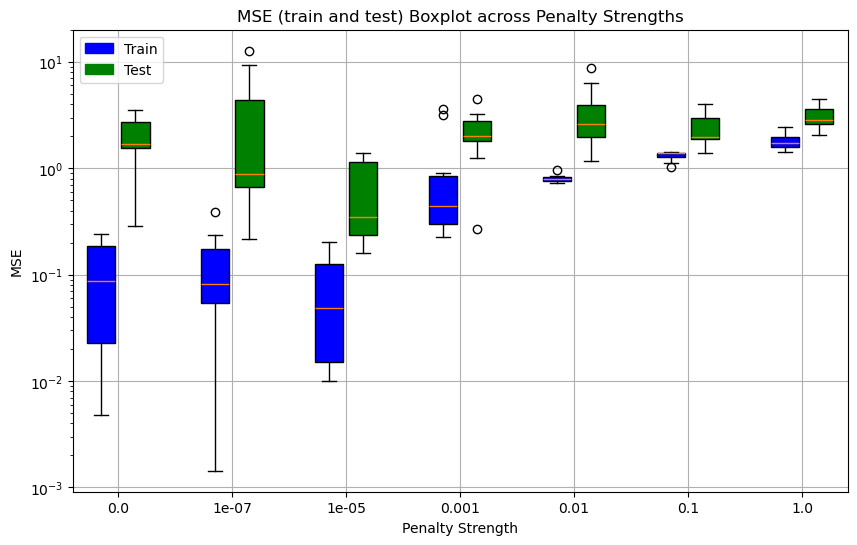

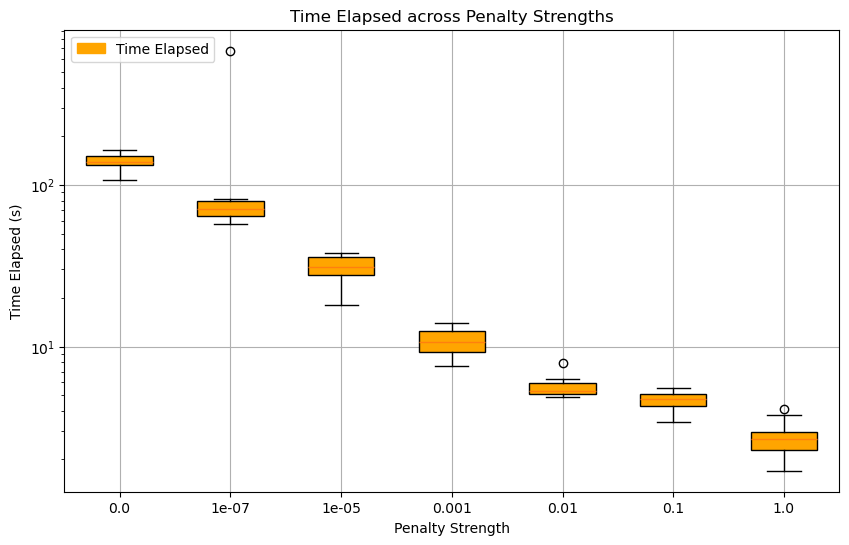

In [4]:
Graphs.plot_boxplots(reg['MSE_collocation'], reg['MSE_collocation_test'], df_reg.index, 'MSE (train and test) Boxplot across Penalty Strengths', 'MSE', colors=('blue', 'green'), color_labels=['Train', 'Test'], x_label = 'Penalty Strength')
# plot_boxplots(MSE_ODEint, MSE_ODEint_Test, df_reg.index, 'MSE Coll ODE', 'MSE', colors=('blue', 'green'), color_labels=['Train', 'Test'])
Graphs.plot_single_boxplot(reg['Times_Elapsed'], df_reg.index, 'Time Elapsed across Penalty Strengths', 'Time Elapsed (s)', color='orange', label='Time Elapsed', x_label = 'Penalty Strength')

---
## Input Features

In [5]:
fn = '2024-08-19_15-13-15_feature_selection.pkl'
with open(f'results/{fn}', 'rb') as file:
    results_feature_selection = pickle.load(file)
    
records = []
for key, values in results_feature_selection.items():
    record = ast.literal_eval(key)
    record.update(values)
    records.append(record)

df = pd.DataFrame(records)
df.sort_values(by='ls', inplace=True)
df['ls'] = [str(ls) for ls in df['ls']]
df.head()

,prev_hour,prev_week,prev_year,m,ls,times_elapsed,mse_odeint,mse_coll_ode,mse_odeint_test,mse_coll_ode_test
13,False,False,False,0,"[4, 32, 1]",3.545858,101.483374,0.176215,266.559002,1.632439
6,False,False,False,1,"[5, 32, 1]",5.393726,125.156086,0.080243,249.550286,1.817134
10,True,False,False,0,"[5, 32, 1]",4.177228,1208.011805,0.010448,1462.042587,0.051284
11,False,False,True,0,"[5, 32, 1]",4.538068,244.256363,0.366051,342.824182,1.970599
12,False,True,False,0,"[5, 32, 1]",5.230899,479.752996,0.145063,649.827811,0.894219


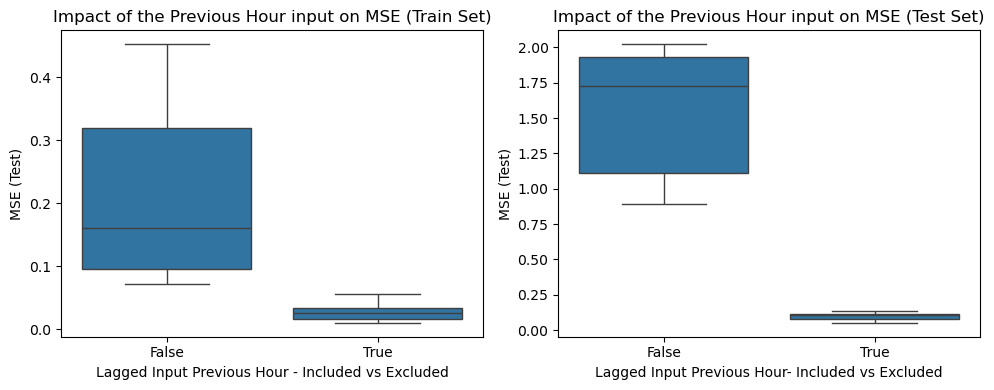

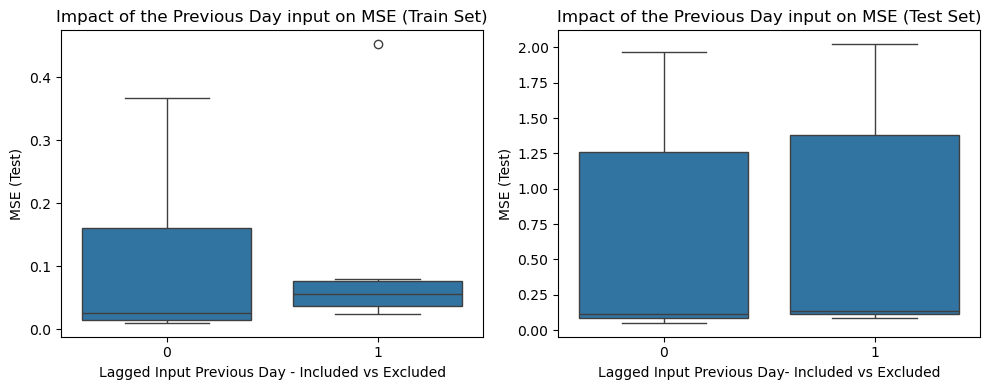

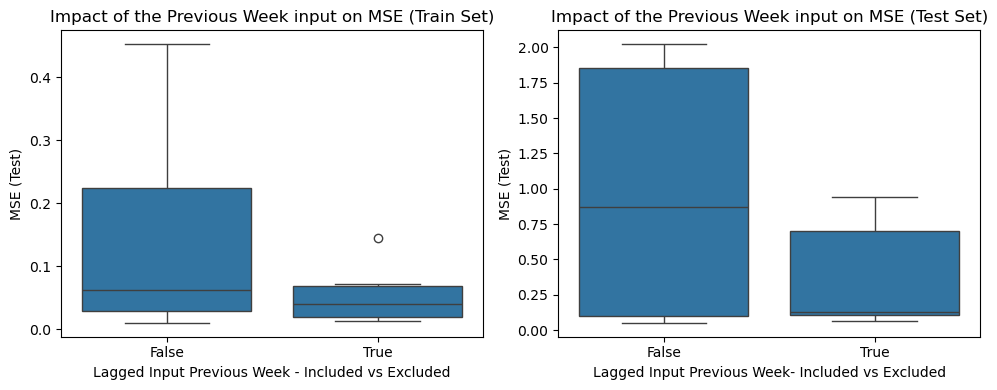

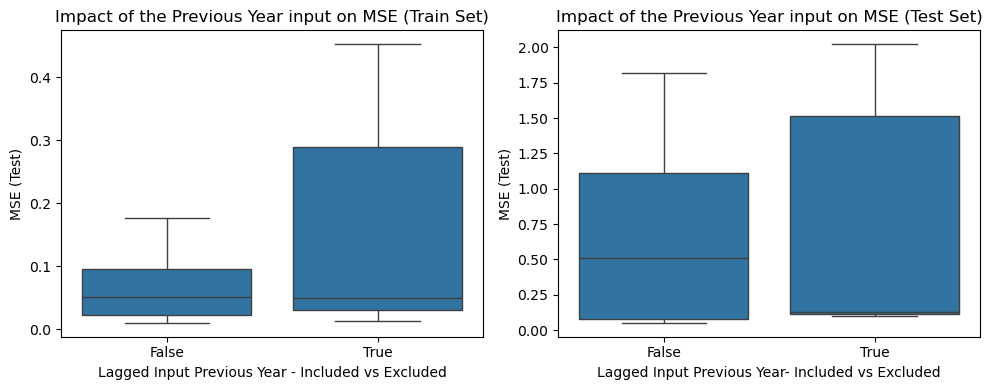

In [6]:
feature_encodings = {'prev_hour':'Previous Hour', 'm':'Previous Day', 'prev_week':'Previous Week', 'prev_year':'Previous Year'}
for feature in feature_encodings:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # Adjust the size of the whole figure

    sns.boxplot(x=feature, y='mse_coll_ode', data=df, ax=axes[0])
    axes[0].set_title(f'Impact of the {feature_encodings[feature]} input on MSE (Train Set)')
    axes[0].set_ylabel('MSE (Test)')
    axes[0].set_xlabel(f'Lagged Input {feature_encodings[feature]} - Included vs Excluded')

    sns.boxplot(x=feature, y='mse_coll_ode_test', data=df, ax=axes[1])
    axes[1].set_title(f'Impact of the {feature_encodings[feature]} input on MSE (Test Set)')
    axes[1].set_ylabel('MSE (Test)')
    axes[1].set_xlabel(f'Lagged Input {feature_encodings[feature]}- Included vs Excluded')

    """sns.boxplot(x=feature, y='times_elapsed', data=df, ax=axes[2])
    axes[2].set_title(f'Impact of the {feature_encodings[feature]} input on MSE (Test Set)')
    axes[2].set_ylabel('Training Time (s)')
    axes[2].set_xlabel(f'Lagged Input {feature_encodings[feature]}- Included vs Excluded')"""

    plt.tight_layout()
    plt.show()

----

## Tolerance Mix

In [7]:
"""
Results saved to results/tol_mix_radau_2024-08-23_13-58-09_full.pkl
Results saved to results/tol_mix_radau_2024-08-23_13-58-09_avg.pkl
"""
fn = 'tol_mix_radau_2024-08-23_13-58-09_avg.pkl'
with open(f'results/{fn}', 'rb') as file:
    results_tol_mix = pickle.load(file)

In [8]:
results_tol_mix.keys()

dict_keys([(0.0001, 0.01, 0.01, 0.1), (0.0001, 0.01, 0.01, 0.0001), (0.0001, 0.01, 0.01, 1e-08), (0.0001, 0.01, 0.0001, 0.1), (0.0001, 0.01, 0.0001, 0.0001), (0.0001, 0.01, 0.0001, 1e-08), (0.0001, 0.0001, 0.01, 0.1), (0.0001, 0.0001, 0.01, 0.0001), (0.0001, 0.0001, 0.01, 1e-08), (0.0001, 0.0001, 0.0001, 0.1), (0.0001, 0.0001, 0.0001, 0.0001), (0.0001, 0.0001, 0.0001, 1e-08), (1e-06, 0.01, 0.01, 0.1), (1e-06, 0.01, 0.01, 0.0001), (1e-06, 0.01, 0.01, 1e-08), (1e-06, 0.01, 0.0001, 0.1), (1e-06, 0.01, 0.0001, 0.0001), (1e-06, 0.01, 0.0001, 1e-08), (1e-06, 0.0001, 0.01, 0.1), (1e-06, 0.0001, 0.01, 0.0001), (1e-06, 0.0001, 0.01, 1e-08), (1e-06, 0.0001, 0.0001, 0.1), (1e-06, 0.0001, 0.0001, 0.0001), (1e-06, 0.0001, 0.0001, 1e-08), (1e-08, 0.01, 0.01, 0.1), (1e-08, 0.01, 0.01, 0.0001), (1e-08, 0.01, 0.01, 1e-08), (1e-08, 0.01, 0.0001, 0.1), (1e-08, 0.01, 0.0001, 0.0001), (1e-08, 0.01, 0.0001, 1e-08), (1e-08, 0.0001, 0.01, 0.1), (1e-08, 0.0001, 0.01, 0.0001), (1e-08, 0.0001, 0.01, 1e-08), (1e-

In [9]:
import ast
import pandas as pd

In [10]:
records = []
for key, values in results_tol_mix.items():
    # Ensure the key is a string
    if isinstance(key, tuple):
        record = dict(zip(['param1', 'param2', 'param3', 'param4'], key))
    else:
        record = ast.literal_eval(key)
    record.update(values)
    records.append(record)

df = pd.DataFrame(records)


In [11]:
col_di = {'param1': 'tol', 'param2': 'constr_viol_tol', 'param3': 'dual_inf_tol', 'param4': 'bound_relax_factor'}
df.rename(columns=col_di, inplace=True)
df.head()

,tol,constr_viol_tol,dual_inf_tol,bound_relax_factor,times_elapsed,mse_odeint,mse_coll_ode,mse_odeint_test,mse_coll_ode_test
0,0.0001,0.01,0.0100,1.000000e-01,4.922415,1063.087814,0.063716,1354.429559,0.126907
1,0.0001,0.01,0.0100,1.000000e-04,4.043764,1034.244164,0.047107,1287.363542,0.083786
2,0.0001,0.01,0.0100,1.000000e-08,3.621512,1052.611594,0.030034,1302.010180,0.131418
3,0.0001,0.01,0.0001,1.000000e-01,4.954309,1063.087814,0.063716,1354.429559,0.126907
4,0.0001,0.01,0.0001,1.000000e-04,5.086991,1034.244164,0.047107,1287.363542,0.083786


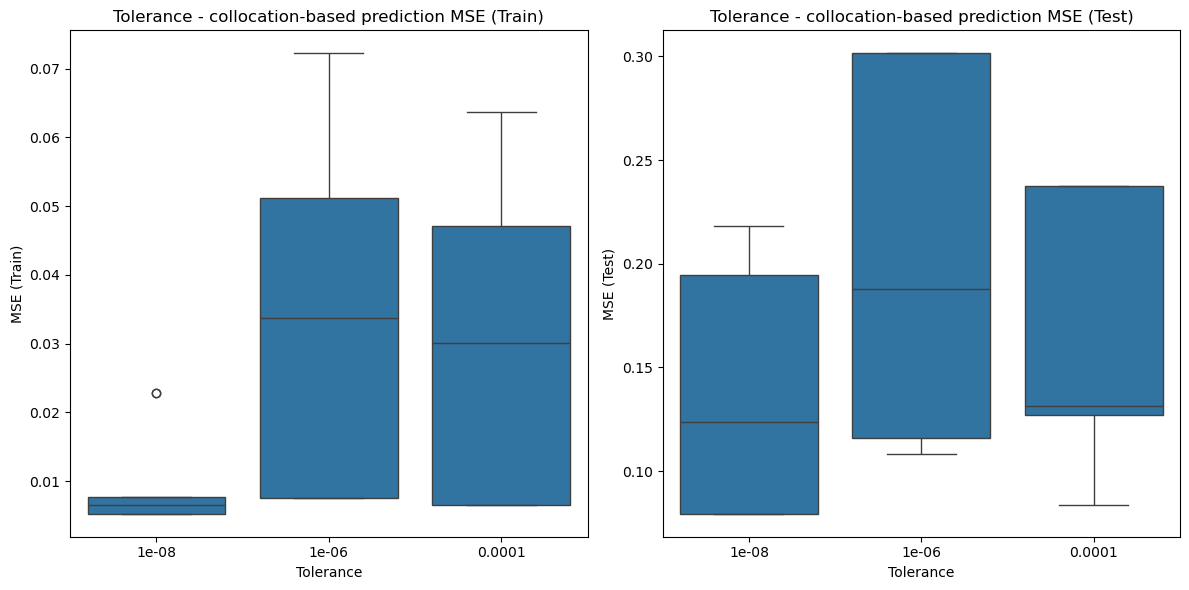

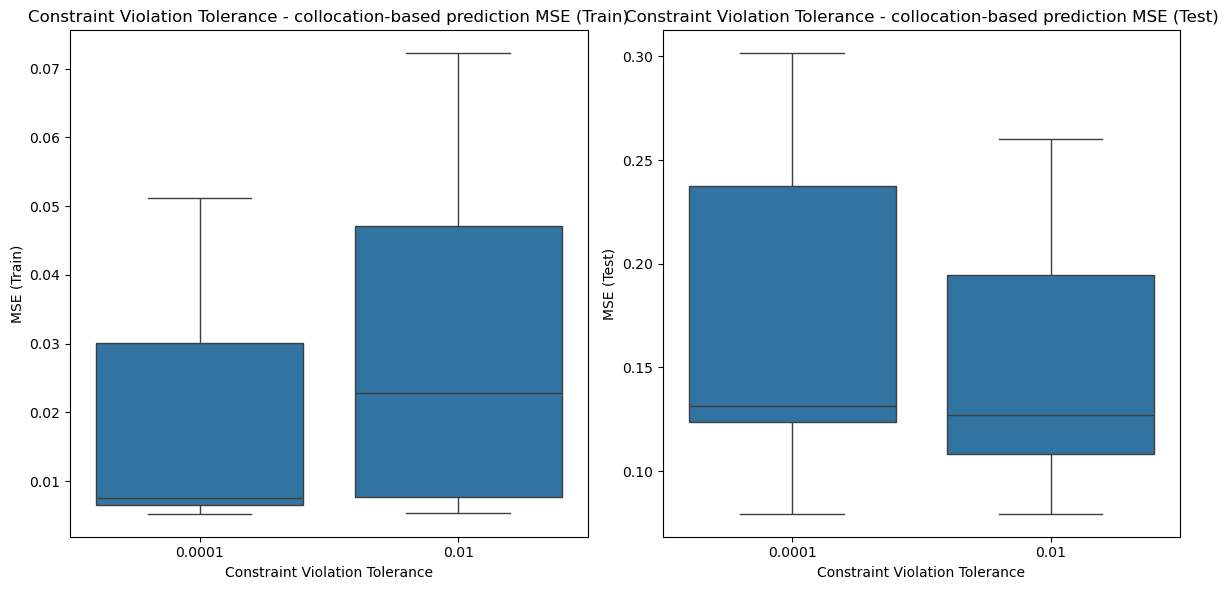

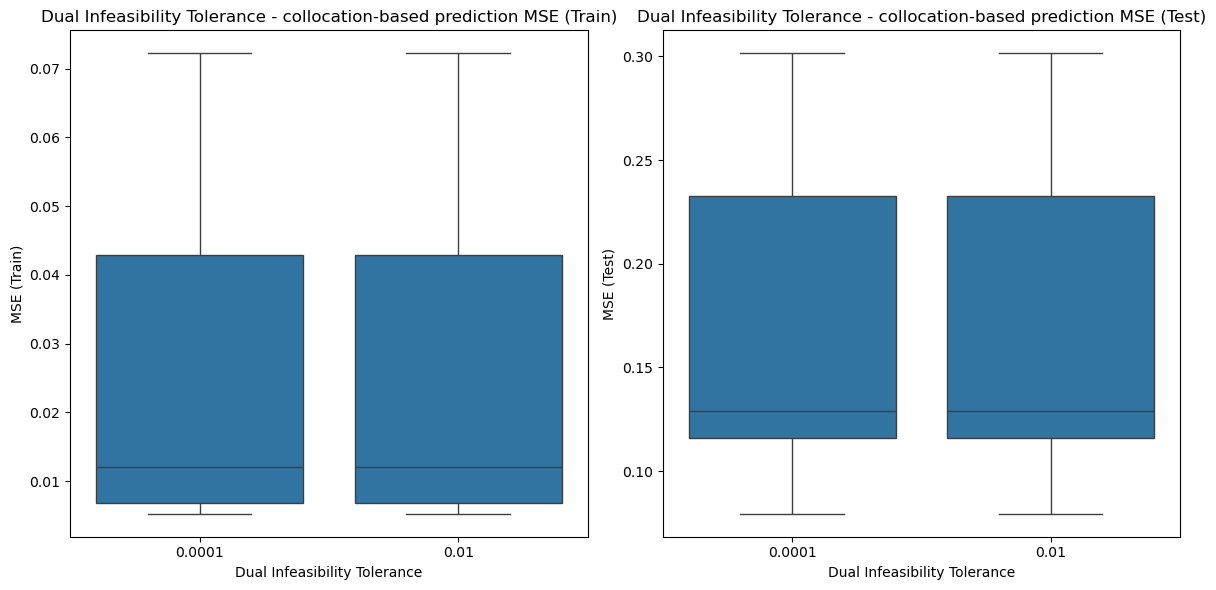

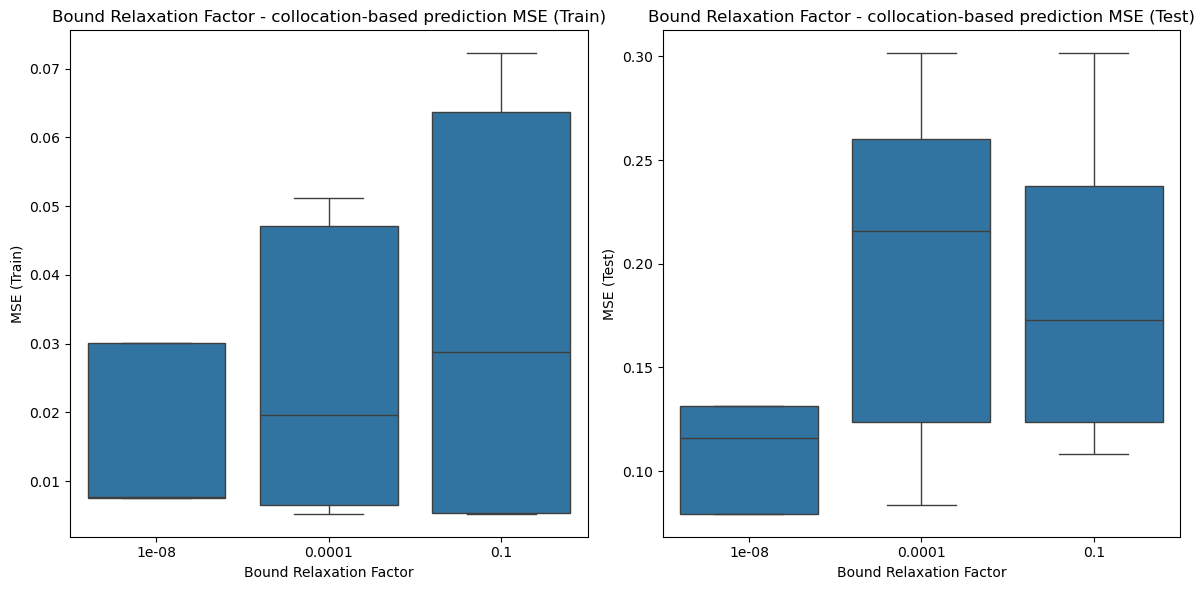

In [12]:
tol_encodings = {'tol':'Tolerance', 'constr_viol_tol':'Constraint Violation Tolerance', 'dual_inf_tol':'Dual Infeasibility Tolerance', 'bound_relax_factor':'Bound Relaxation Factor'}

for tol_type in col_di.values():
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  

    sns.boxplot(x=tol_type, y='mse_coll_ode', data=df, ax=axes[0])
    axes[0].set_title(f'{tol_encodings[tol_type]} - collocation-based prediction MSE (Train)')
    axes[0].set_ylabel('MSE (Train)')
    axes[0].set_xlabel(f'{tol_encodings[tol_type]}')
    
    sns.boxplot(x=tol_type, y='mse_coll_ode_test', data=df, ax=axes[1])
    axes[1].set_title(f'{tol_encodings[tol_type]} - collocation-based prediction MSE (Test)')
    axes[1].set_ylabel('MSE (Test)')
    axes[1].set_xlabel(f'{tol_encodings[tol_type]}')
    
    #sns.boxplot(x=tol_type, y='times_elapsed', data=df, ax=axes[2])
    #axes[2].set_title(f'{tol_type} - Times Elapsed')

    plt.tight_layout()
    plt.show()

---
## Spacing Type

In [13]:
fn = '2024-08-19_13-40-37_spacing_type_full.pkl'
with open(f'results/{fn}', 'rb') as file:
    results_spacing_type = pickle.load(file)

df_spacing = Results.collect_data(results_spacing_type)

raname_map = {'chebyshev':'chebyshev', 'gauss_legendre':'legendre-gauss', 'gauss_lobatto':'legendre-gauss-lobatto', 'gauss_radau':'legendre-gauss-radau'}
df_spacing.index = pd.Series(df_spacing.index).map(raname_map)

spacing = Results.columns_to_lists(df_spacing)
spacing.keys()

dict_keys(['Times_Elapsed', 'MSE_odeint', 'MSE_collocation', 'MSE_odeint_test', 'MSE_collocation_test'])

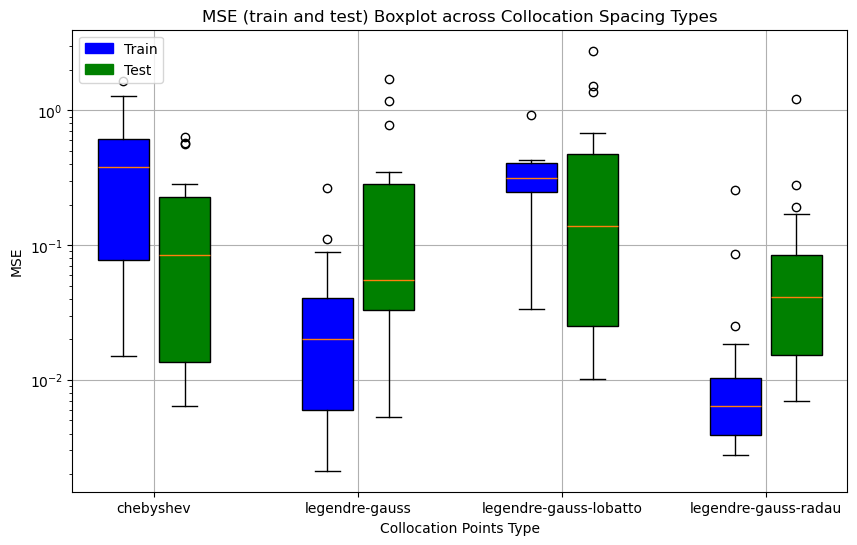

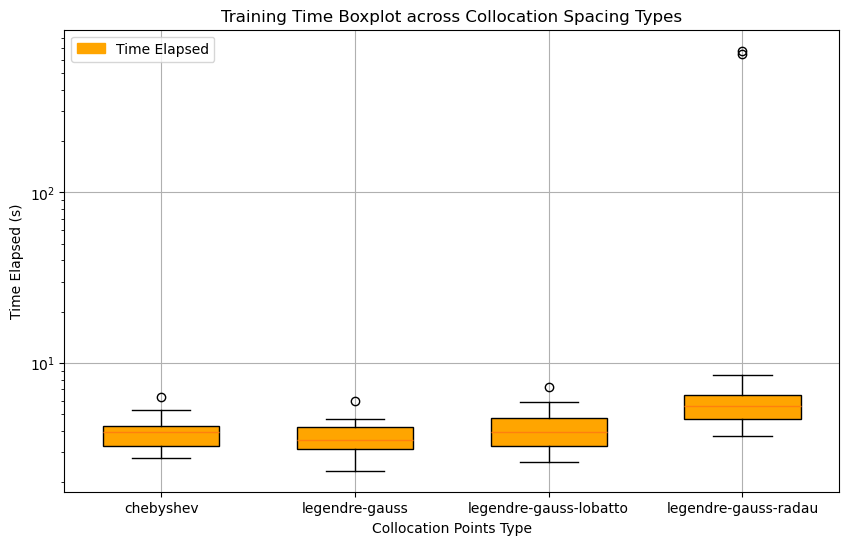

In [14]:
Graphs.plot_boxplots(spacing['MSE_collocation'], spacing['MSE_collocation_test'], df_spacing.index, 'MSE (train and test) Boxplot across Collocation Spacing Types', 'MSE', colors=('blue', 'green'), color_labels=['Train', 'Test'], x_label = 'Collocation Points Type')
Graphs.plot_single_boxplot(spacing['Times_Elapsed'], df_spacing.index, 'Training Time Boxplot across Collocation Spacing Types', 'Time Elapsed (s)', color='orange', label='Time Elapsed', x_label = 'Collocation Points Type')

---
## Tolerance

In [15]:
fn = '2024-08-15_22-45-05_tol_full.pkl'
with open(f'results/{fn}', 'rb') as file:
    results_tol_full = pickle.load(file)
    
df_tol = Results.collect_data(results_tol_full)
tol = Results.columns_to_lists(df_tol)
tol.keys()

dict_keys(['Times_Elapsed', 'MSE_odeint', 'MSE_collocation', 'MSE_odeint_test', 'MSE_collocation_test'])

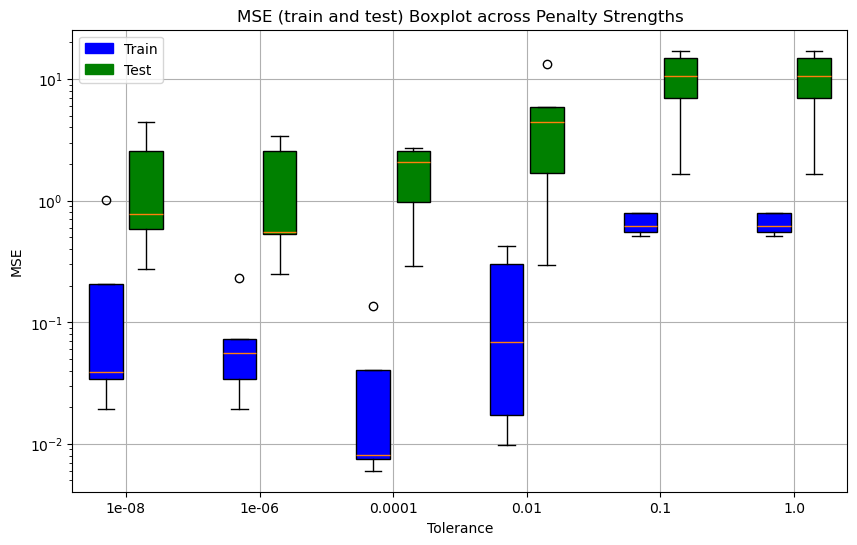

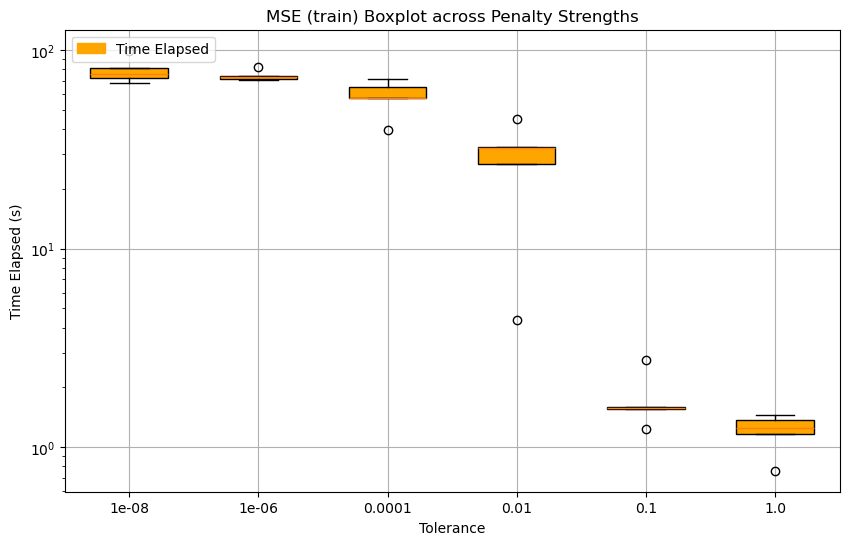

In [16]:
Graphs.plot_boxplots(tol['MSE_collocation'], tol['MSE_collocation_test'], df_tol.index, 'MSE (train and test) Boxplot across Penalty Strengths', 'MSE', colors=('blue', 'green'), color_labels=['Train', 'Test'], x_label = 'Tolerance')
Graphs.plot_single_boxplot(tol['Times_Elapsed'], df_tol.index, 'MSE (train) Boxplot across Penalty Strengths', 'Time Elapsed (s)', color='orange', label='Time Elapsed', x_label = 'Tolerance')

---
## Regularization - Tolerance grid search

In [17]:
fn = '2024-08-16_12-41-29_tol_reg_full.pkl'
#fn = 'reg_tol_2024-08-23_20-07-05_full.pkl'
with open(f'results/{fn}', 'rb') as file:
    results_tol_reg_full = pickle.load(file)

In [18]:
fn = '2024-08-16_12-41-40_tol_reg_avg.pkl'
with open(f'results/{fn}', 'rb') as file:
    results_tol_reg_avg = pickle.load(file)

* To create a heatmap of the reg. and tol. values, create a dataframe with the following columns:
    * "penalty"
    * "tol"
    * "mean_test_score"
* `key[0]` is a tuple `(PENALTY, TOL)`

In [22]:
df_reg_tol = Results.collect_data(results_tol_reg_full)

penalty = [i[0] for i in df_reg_tol.index]
tol = [i[1] for i in df_reg_tol.index]

def mean_of_list(lst):
    return sum(lst) / len(lst) if lst else None

df_reg_tol = df_reg_tol.map(mean_of_list)

df_reg_tol['Penalty'] = penalty
df_reg_tol['Tolerance'] = tol
df_reg_tol.reset_index(drop=True, inplace=True)

In [23]:
df_reg_tol.head()

,Times_Elapsed,MSE_odeint,MSE_collocation,MSE_odeint_test,MSE_collocation_test,Penalty,Tolerance
0,111.776554,53.471367,0.066309,95.163311,2.323467,0.0,1.000000e-08
1,152.728333,8.042448,0.082329,6.766372,1.452066,0.0,1.000000e-06
2,82.247447,82.218840,0.040925,118.547182,1.531300,0.0,1.000000e-04
3,41.408996,237.341205,0.151236,352.786075,4.910221,0.0,1.000000e-02
4,1.751040,0.612332,0.652102,14.563527,10.193938,0.0,1.000000e-01


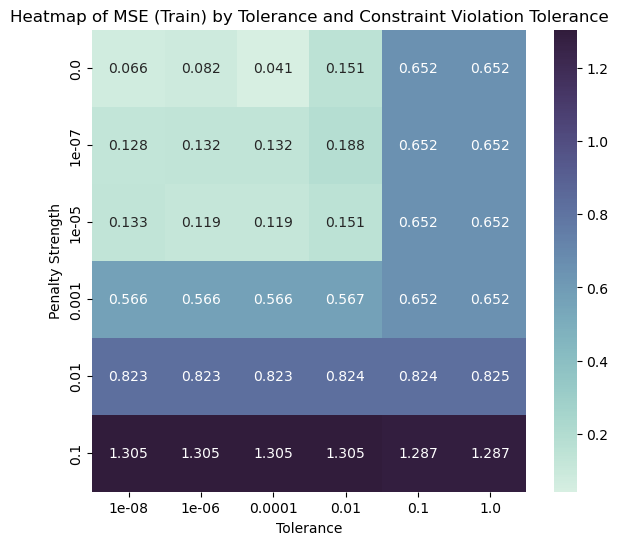

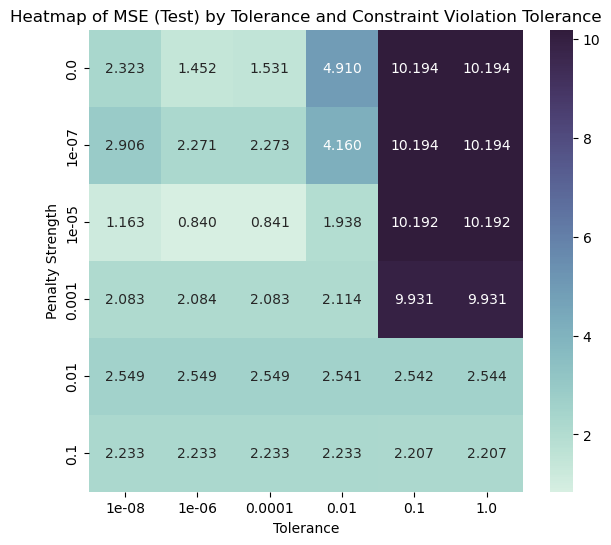

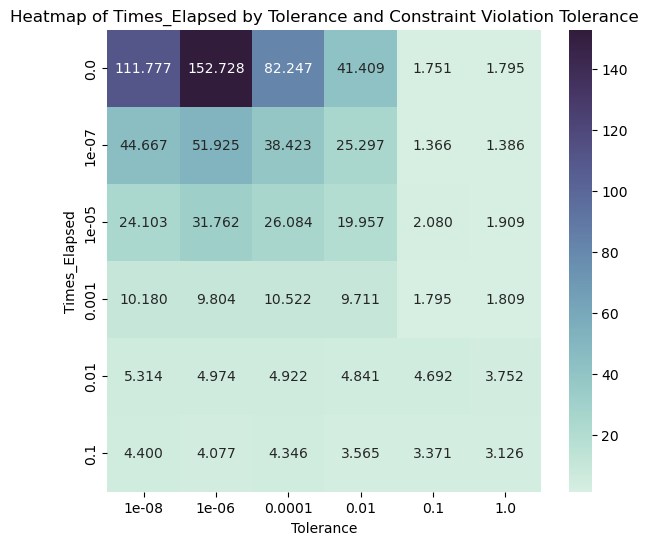

In [24]:
pivot_table = df_reg_tol.pivot(index='Penalty', columns=['Tolerance'], values='MSE_collocation')
cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True, light=0.9)

plt.figure(figsize=(7, 6))
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap=cmap, annot_kws={'size': 10})
plt.title('Heatmap of MSE (Train) by Tolerance and Constraint Violation Tolerance')
plt.ylabel('Penalty Strength')
plt.show()

pivot_table = df_reg_tol.pivot(index='Penalty', columns=['Tolerance'], values='MSE_collocation_test')
cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True, light=0.9)

plt.figure(figsize=(7, 6))
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap=cmap, annot_kws={'size': 10})
plt.title('Heatmap of MSE (Test) by Tolerance and Constraint Violation Tolerance')
plt.ylabel('Penalty Strength')
plt.show()

pivot_table = df_reg_tol.pivot(index='Penalty', columns=['Tolerance'], values='Times_Elapsed')
cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True, light=0.9)

plt.figure(figsize=(7, 6))
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap=cmap, annot_kws={'size': 10})
plt.title('Heatmap of Times_Elapsed by Tolerance and Constraint Violation Tolerance')
plt.ylabel('Times_Elapsed')
plt.show()

---
## Network Size

In [25]:
"""
Results saved to results/net_size_radau_2024-08-23_15-04-47_full.pkl
Results saved to results/net_size_radau_2024-08-23_15-04-47_avg.pkl
"""

'\nResults saved to results/net_size_radau_2024-08-23_15-04-47_full.pkl\nResults saved to results/net_size_radau_2024-08-23_15-04-47_avg.pkl\n'

In [35]:
Results = reload_module('analyse_results', 'Results')
fn = 'net_size_radau_2024-08-23_15-04-47_full.pkl'
with open(f'results/{fn}', 'rb') as file:
    results_net_size_full = pickle.load(file)
    
fn = 'net_size_radau_2024-08-23_15-04-47_avg.pkl'
with open(f'results/{fn}', 'rb') as file:
    results_net_size_avg = pickle.load(file)

In [38]:
Results.key_sample(results_net_size_full)

('[6, 16, 1]', 0, '2015-01-01')

In [51]:
def custom_sort_key(lst):
    return (len(lst), lst)

In [54]:
Results = reload_module('analyse_results', 'Results')
Results.key_sample(results_net_size_full)
df = Results.parse_results(results_net_size_full, ['ls', 'regularization', 'date'])
df_bx = Results.prep_for_boxplots(df, ['ls'], ['mse_coll_ode', 'mse_coll_ode_test', 'times_elapsed'])

df_bx['sort_key'] = df_bx['x_labels'].apply(custom_sort_key)
df_bx = df_bx.sort_values(by='sort_key')
df_bx.drop(columns='sort_key', inplace=True)
df_bx

,mse_coll_ode,mse_coll_ode_test,times_elapsed,x_labels
1,"[0.028493110537301594, 0.030058402025387624, 0...","[0.19860489711734686, 0.4140464229789177, 0.00...","[5.208147048950195, 5.353545188903809, 3.27817...","[6, 16, 1]"
2,"[0.1498640320699178, 0.1575184510855925, 0.228...","[0.3017180111333611, 0.5394433823485928, 0.025...","[4.2694010734558105, 6.473681926727295, 5.9222...","[6, 32, 1]"
3,"[0.200513539398833, 0.22171638512854042, 0.038...","[0.3685086521401875, 3.059065916960904, 0.0315...","[17.096319913864136, 12.965358018875122, 14.81...","[6, 64, 1]"
0,"[0.35414941489441193, 0.05088750093378449, 0.6...","[0.1282596000672475, 2.8236418107373487, 0.058...","[23.12026596069336, 35.69369101524353, 53.4508...","[6, 128, 1]"


In [59]:
df.sort_values(by='mse_coll_ode').tail(15)

,ls,regularization,date,result,times_elapsed,mse_odeint,mse_coll_ode,mse_odeint_test,mse_coll_ode_test
28,"[6, 32, 1]",0.001,2015-01-07,"{'solver_time': 4.278476715087891, 'terminatio...",4.278477,253.367268,0.249895,528.203873,2.850989
13,"[6, 16, 1]",0.001,2015-01-07,"{'solver_time': 1.6411700248718262, 'terminati...",1.641170,129.364004,0.264182,306.846939,0.458631
26,"[6, 32, 1]",0.001,2015-01-03,"{'solver_time': 2.577971935272217, 'terminatio...",2.577972,294.932156,0.280535,472.483993,1.543336
45,"[6, 128, 1]",0.000,2015-01-01,"{'solver_time': 23.12026596069336, 'terminatio...",23.120266,3735.068018,0.354149,5028.079303,0.128260
44,"[6, 64, 1]",0.001,2015-01-09,"{'solver_time': 4.445941925048828, 'terminatio...",4.445942,571.196289,0.356208,880.275218,2.316790
41,"[6, 64, 1]",0.001,2015-01-03,"{'solver_time': 4.798032283782959, 'terminatio...",4.798032,525.194814,0.359355,781.965038,1.469097
42,"[6, 64, 1]",0.001,2015-01-05,"{'solver_time': 5.117065906524658, 'terminatio...",5.117066,479.303378,0.386606,809.038937,2.535747
3,"[6, 16, 1]",0.000,2015-01-07,"{'solver_time': 3.6251180171966553, 'terminati...",3.625118,1405.712432,0.404797,2538.542118,0.056034
43,"[6, 64, 1]",0.001,2015-01-07,"{'solver_time': 3.0186328887939453, 'terminati...",3.018633,448.765925,0.521492,840.095673,2.776357
47,"[6, 128, 1]",0.000,2015-01-05,"{'solver_time': 53.450833797454834, 'terminati...",53.450834,2042.635752,0.617003,3204.415438,0.058575


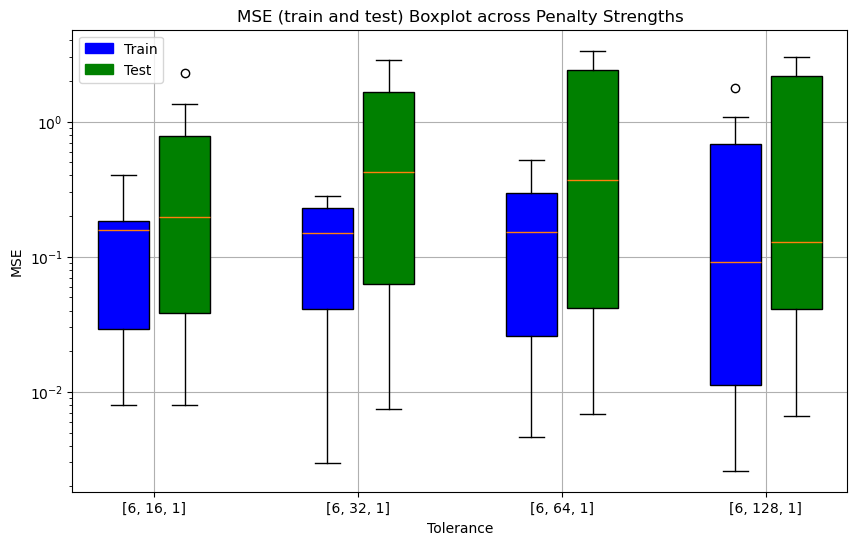

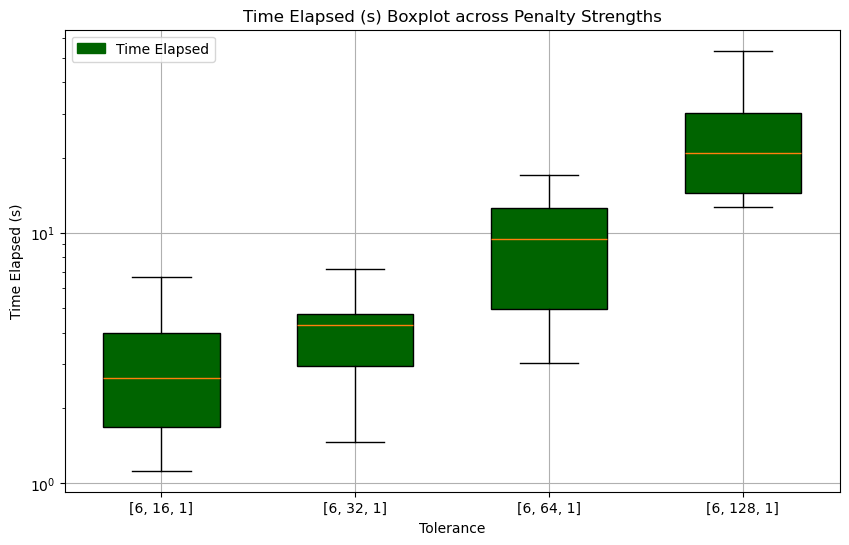

In [55]:
Graphs.plot_boxplots(df_bx.mse_coll_ode, df_bx.mse_coll_ode_test, df_bx.x_labels, 'MSE (train and test) Boxplot across Penalty Strengths', 'MSE', colors=('blue', 'green'), color_labels=['Train', 'Test'], x_label = 'Tolerance')
Graphs.plot_single_boxplot(df_bx.times_elapsed, df_bx.x_labels, 'Time Elapsed (s) Boxplot across Penalty Strengths', 'Time Elapsed (s)', color='darkgreen', label='Time Elapsed', x_label = 'Tolerance')

In [60]:
# save to pickle
path = 'interim_results/pyomo_net_size.pkl'
with open(path, 'wb') as file:
    pickle.dump(df_bx, file)
print(f"Results saved to {path}")

Results saved to interim_results/pyomo_net_size.pkl


---
## Training Loss Convergence

In [107]:
fn = 'training_2024-08-23_23-16-24_full.pkl'
with open(f'results/{fn}', 'rb') as file:
    results_convergence = pickle.load(file)

In [108]:
"""fn = 'training_2024-08-24_11-29-01_full.pkl'
with open(f'results/{fn}', 'rb') as file:
    results_convergence_extra = pickle.load(file)
results_convergence.update(results_convergence_extra)"""

"fn = 'training_2024-08-24_11-29-01_full.pkl'\nwith open(f'results/{fn}', 'rb') as file:\n    results_convergence_extra = pickle.load(file)\nresults_convergence.update(results_convergence_extra)"

In [109]:
records = []
for key, values in results_convergence.items():
    # ensure the key is a string
    if isinstance(key, tuple):
        record = dict(zip(['iteration', 'date'], key))
    else:
        # evaluate the string to a dictionary
        record = ast.literal_eval(key)
    # merge key - value pairs
    record.update(values)
    # append the record to the list
    records.append(record)

df = pd.DataFrame(records)

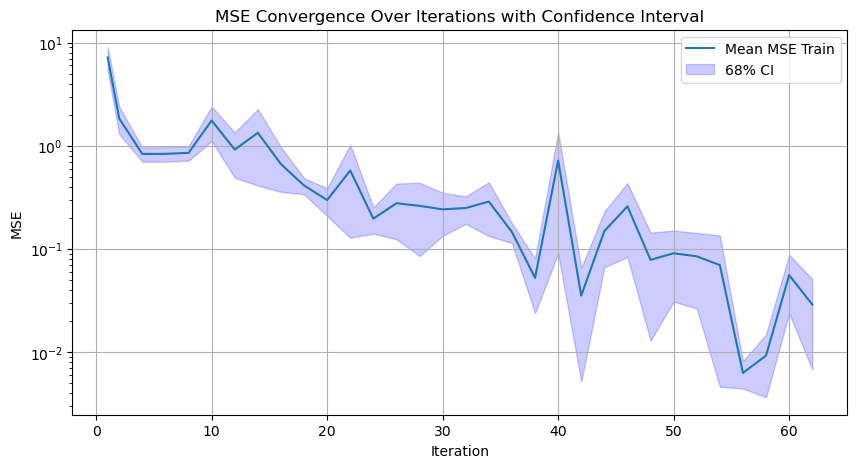

In [110]:
df_grouped = pd.DataFrame(df)

# group by iteration to calculate mean and standard deviation (or SEM for tighter CI)
mean_mse = df_grouped.groupby('iteration')['mse_coll_ode'].mean()
std_mse = df_grouped.groupby('iteration')['mse_coll_ode'].std()
sem_mse = std_mse / np.sqrt(df_grouped.groupby('iteration').size())  # Standard Error of the Mean for CI

# group by iteration to calculate mean and standard deviation (or SEM for tighter CI)
mean_mse_test = df_grouped.groupby('iteration')['mse_coll_ode_test'].mean()
std_mse_test = df_grouped.groupby('iteration')['mse_coll_ode_test'].std()
sem_mse_test = std_mse_test / np.sqrt(df_grouped.groupby('iteration').size())  # Standard Error of the Mean for CI


plt.figure(figsize=(10, 5))
plt.grid()
plt.plot(mean_mse.index, mean_mse.values, label='Mean MSE Train')
plt.fill_between(mean_mse.index, (mean_mse - sem_mse), (mean_mse +  sem_mse), color='b', alpha=0.2, label='68% CI')
#plt.plot(mean_mse_test.index, mean_mse_test.values, label='Mean MSE Train')
#plt.fill_between(mean_mse_test.index, (mean_mse_test - sem_mse_test), (mean_mse_test +  sem_mse_test), color='b', alpha=0.2, label='68% CI')

plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('MSE Convergence Over Iterations with Confidence Interval')
plt.legend()
plt.yscale('log')
plt.show()



In [118]:
df_grouped = df.groupby(['date']).agg(list)
sample_row = df_grouped.iloc[2,:]
sample_row

iteration            [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24...
result               [{'solver_time': 0.20638680458068848, 'termina...
times_elapsed        [0.20638680458068848, 0.3820958137512207, 0.38...
mse_odeint           [11.944055075199225, 5.02728991482694, 0.49390...
mse_coll_ode         [11.409331250219234, 3.4556221299574257, 0.557...
mse_odeint_test      [4.954112264792984, 13.871671439029017, 1.2359...
mse_coll_ode_test    [2.4064058913413855, 8.741707917922215, 1.1368...
Name: 2015-01-05, dtype: object

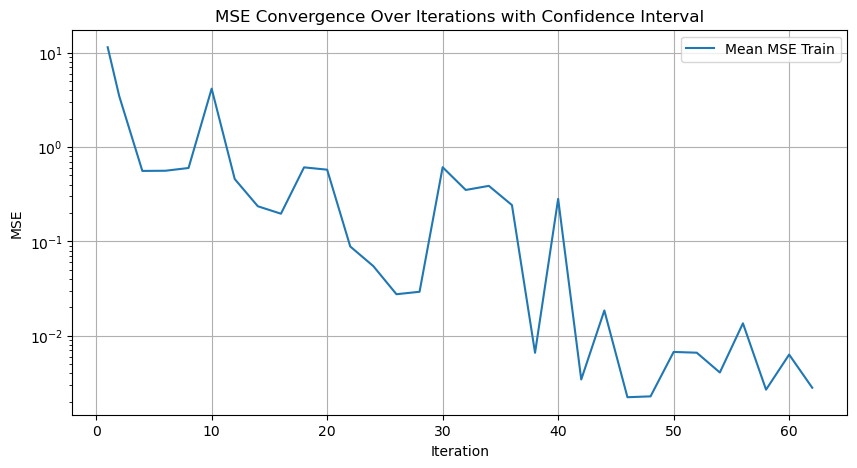

In [121]:
plt.figure(figsize=(10, 5))
plt.grid()
plt.plot(sample_row.iteration, sample_row.mse_coll_ode, label='Mean MSE Train')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('MSE Convergence Over Iterations with Confidence Interval')
plt.legend()
plt.yscale('log')
plt.show()

In [50]:
df_grouped.iloc[0,:]

iteration            [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24...
result               [{'solver_time': 0.23511695861816406, 'termina...
times_elapsed        [0.23511695861816406, 0.3327150344848633, 0.39...
mse_odeint           [0.8717804868588197, 0.6259273778262897, 0.593...
mse_coll_ode         [0.8094574414067333, 0.9613977881582216, 1.215...
mse_odeint_test      [17.560053759142093, 7.415690399519503, 11.065...
mse_coll_ode_test    [15.24536076568443, 10.063217752847777, 10.644...
Name: 2015-01-01, dtype: object

[]

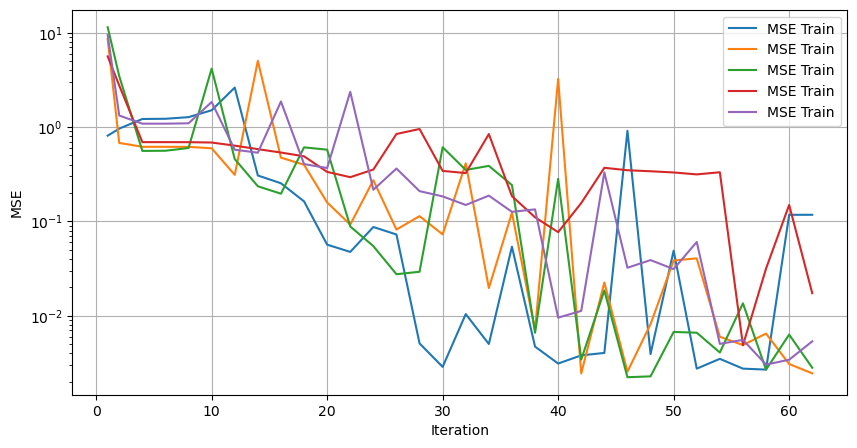

In [59]:
row = df_grouped.iloc[0,:]
plt.figure(figsize=(10, 5))
plt.grid()
for i in range(df_grouped.shape[0]):
    row = df_grouped.iloc[i,:]
    plt.plot(row.iteration, row.mse_coll_ode, label='MSE Train')
    #plt.plot(row.iteration, row.mse_coll_ode_test, label='MSE Test')
plt.legend()
plt.yscale('log')
#desc = {'ho': 'Harmonic Oscillator', 'vdp': 'Van Der Pol', 'do': 'Damped Oscillator'}
#plt.title(f'MSE Train for {desc[data]} with different initialization')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.plot()